In [1]:
#Importing the necessary libraries: pandas, numpy, sklearn's PCA, and StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## 1. Principal Component Analysis
a. Apply PCA on CC dataset
b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?
c. Perform Scaling+PCA+K-Means and report performance.

In [2]:
#Loading the dataset cc into a pandas dataframe.
data_CC = pd.read_csv('CC.csv')
data_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
# First five rows of CC 
data_CC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Checking if any Value is null in the data
data_CC.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [5]:
#Replacing the null values with mean value
data_CC.fillna(data_CC.mean(), inplace=True)
data_CC.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [6]:
data_CC['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [7]:
x1 = data_CC.iloc[:,1:-1]
y1 = data_CC.iloc[:,-1]
print(x1.shape,y1.shape)

(8950, 16) (8950,)


1a) Apply PCA on data set CC

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_CC['CUST_ID'] = le.fit_transform(data_CC.CUST_ID.values)

pca3 = PCA(n_components=3)
principalComp = pca3.fit_transform(x1)

principalDf = pd.DataFrame(data = principalComp, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, data_CC[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,TENURE
0,-4326.383979,921.566882,183.708383,12
1,4118.916665,-2432.846346,2369.969289,12
2,1497.907641,-1997.578694,-2125.631328,12
3,1394.548536,-1488.743453,-2431.799649,12
4,-3743.351896,757.342657,512.476492,12


1b) Apply K Means on PCA Result

In [10]:
X = finalDf.iloc[:,0:-1]
y = finalDf.iloc[:,-1]

In [11]:
nclstrs = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclstrs)
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)


# Summary of the predictions made by the classifier
print(classification_report(y, y_cluster_kmeans, zero_division=1))
print(confusion_matrix(y, y_cluster_kmeans))


train_accuracy = accuracy_score(y, y_cluster_kmeans)
print("\nAccuracy for our Training dataset with PCA:", train_accuracy)


#Calculate sihouette Score
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("Sihouette Score: ",score)

              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           6       1.00      0.00      0.00     204.0
           7       1.00      0.00      0.00     190.0
           8       1.00      0.00      0.00     196.0
           9       1.00      0.00      0.00     175.0
          10       1.00      0.00      0.00     236.0
          11       1.00      0.00      0.00     365.0
          12       1.00      0.00      0.00    7584.0

    accuracy                           0.00    8950.0
   macro avg       0.70      0.30      0.00    8950.0
weighted avg       1.00      0.00      0.00    8950.0

[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 175   28    1    0    0    0    0    0    0    0]
 [ 173   15    2    0    0   

Sihouette Score- ranges from −1 to +1 , a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [12]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=3))
])

# Fit the pipeline on the dataset
pipeline.fit(data_CC)

# Calculate the silhouette score
silhouette_score_pipeline = metrics.silhouette_score(data_CC, pipeline.predict(data_CC))
print('Silhouette score with Scaling+PCA+K-Means:', silhouette_score_pipeline)

Silhouette score with Scaling+PCA+K-Means: 0.2684754442520469


## 2. Use pd_speech_features.csv
a. Perform Scaling
b. Apply PCA (k=3)
c. Use SVM to report performance

In [13]:
# 2 Read the data from the CSV file and print the info
data_pd = pd.read_csv('pd_speech_features.csv')
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [15]:
# print the first 5 rows
data_pd.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [16]:
# check if there any null values
data_pd.isnull().any()

id                           False
gender                       False
PPE                          False
DFA                          False
RPDE                         False
                             ...  
tqwt_kurtosisValue_dec_33    False
tqwt_kurtosisValue_dec_34    False
tqwt_kurtosisValue_dec_35    False
tqwt_kurtosisValue_dec_36    False
class                        False
Length: 755, dtype: bool

In [17]:
X = data_pd.drop('class',axis=1).values
y = data_pd['class'].values

In [24]:
#2a) performing Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2.b Apply PCA with k =3

In [26]:
# perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','Principal Component 3'])

finalDf = pd.concat([principalDf, data_pd[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Principal Component 3,class
0,-10.047372,1.471076,-6.846404,1
1,-10.637725,1.583749,-6.830976,1
2,-13.516185,-1.253542,-6.818698,1
3,-9.155083,8.833599,15.290903,1
4,-6.764469,4.611465,15.637120,1


In [27]:
# drop the class column
X = finalDf.drop('class',axis=1).values
y = finalDf['class'].values

# Split the data into training and testing components
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.34,random_state=0)

2c ) SVM Machine

In [30]:
# import SVC
from sklearn.svm import SVC
# train an SVM model
svm_model = SVC(kernel="linear", C=1)
svm_model.fit(X_train, y_train)

# predict the target variable for the testing set
y_pred = svm_model.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

# print the accuracy of the model
print("Accuracy is :", accuracy)

#Calculate silhouette Score
score = metrics.silhouette_score(X_test, y_pred)
print("Silhouette Score is : ",score) 

              precision    recall  f1-score   support

           0       0.72      0.37      0.49        62
           1       0.83      0.95      0.89       196

    accuracy                           0.81       258
   macro avg       0.77      0.66      0.69       258
weighted avg       0.80      0.81      0.79       258

[[ 23  39]
 [  9 187]]
Accuracy is : 0.813953488372093
Silhouette Score is :  0.28490970487273404


## 3) Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data tok=2

In [31]:
import pandas as pd

# Load the dataset
iris = pd.read_csv('Iris.csv')

In [32]:
# Separate the features and the target variable
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [33]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA to the dataset
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

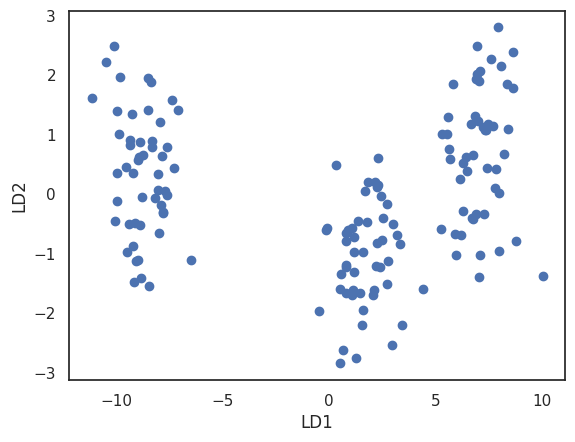

In [37]:
import matplotlib.pyplot as plt

# Visualize the results
plt.scatter(X_lda[:, 0], X_lda[:, 1])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

## 4) Briefly identify the difference between PCA and LDA

PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both dimensionality reduction techniques used in machine learning, but they have different objectives and methods.

PCA is an unsupervised learning technique used to reduce the dimensionality of a dataset by identifying and extracting the most important features that capture the maximum amount of variance in the data. The goal of PCA is to find a new set of uncorrelated variables called principal components, which are linear combinations of the original variables. The principal components are ranked by their explained variance, with the first principal component explaining the most variance in the data, and subsequent components explaining decreasing amounts.

LDA, on the other hand, is a supervised learning technique used to reduce the dimensionality of a dataset while preserving the class-discriminatory information. The goal of LDA is to find a new set of variables that maximize the separation between classes in the data. This is achieved by computing a set of discriminant functions that project the data onto a lower-dimensional space while maximizing the between-class scatter and minimizing the within-class scatter.

In summary, while both techniques aim to reduce the dimensionality of a dataset, PCA is unsupervised and focuses on maximizing variance, while LDA is supervised and focuses on maximizing class separability.